<a href="https://colab.research.google.com/github/bukrathezer/PlateDetectionWithYOLOv8/blob/main/PlakaTespit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install ultralytics
!pip install opencv-python-headless
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.8/823.8 kB 9.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
!pip install python-bidi==0.4.2
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import easyocr

  Attempting uninstall: python-bidi
    Found existing installation: python-bidi 0.5.0
    Uninstalling python-bidi-0.5.0:
      Successfully uninstalled python-bidi-0.5.0


In [4]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 215MB/s]


In [5]:
yaml_content = """
train: /content/drive/MyDrive/Arac_Plaka/data/images/train
val: /content/drive/MyDrive/Arac_Plaka/data/images/val

nc: 1  # Sınıf sayısı
names: ['plate']  # Sınıf isimleri
"""

# Specify the encoding as 'utf-8' to handle Turkish characters
with open('/content/drive/MyDrive/Arac_Plaka/data.yaml', 'w', encoding='utf-8') as file:
    file.write(yaml_content)

In [6]:
model.train(data='/content/drive/MyDrive/Arac_Plaka/data.yaml', epochs=20, imgsz=640)

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Arac_Plaka/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 40.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Arac_Plaka/data/labels/train.cache... 1740 images, 205 backgrounds, 0 corrupt: 100%|██████████| 1945/1945 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/train/306.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/train/324.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/train/339.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/train/340.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/train/346.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/train/357.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/train/360.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/train/369.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/train/375.jpg: corrupt JPEG restored and saved
t

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Arac_Plaka/data/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/val/105.jpg: corrupt JPEG restored and saved


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.42G      1.031      2.074     0.9588         14        640: 100%|██████████| 122/122 [02:03<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         10         10      0.967        0.9      0.986      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.25G     0.8952       1.13     0.8931         17        640: 100%|██████████| 122/122 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all         10         10      0.983          1      0.995      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.25G     0.8766      0.903     0.8959         10        640: 100%|██████████| 122/122 [00:52<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         10         10          1      0.978      0.995      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.25G     0.8152     0.7612     0.8777          9        640: 100%|██████████| 122/122 [00:50<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all         10         10          1      0.985      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.25G     0.7625     0.6751     0.8685         19        640: 100%|██████████| 122/122 [00:51<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all         10         10          1      0.966      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.25G     0.7653     0.6567     0.8659         14        640: 100%|██████████| 122/122 [00:54<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.63it/s]

                   all         10         10      0.903      0.928      0.986      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.25G     0.7347      0.614     0.8622          9        640: 100%|██████████| 122/122 [00:49<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         10         10      0.994          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.25G     0.7216     0.6178     0.8546         17        640: 100%|██████████| 122/122 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         10         10      0.995          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.25G     0.6773     0.5853      0.848          9        640: 100%|██████████| 122/122 [00:52<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         10         10      0.909      0.994      0.986       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.25G      0.672     0.5625      0.845         16        640: 100%|██████████| 122/122 [00:52<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all         10         10      0.993          1      0.995      0.884


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.39G      0.684     0.5593     0.8397          8        640: 100%|██████████| 122/122 [00:53<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         10         10      0.993          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.25G     0.6396     0.5289     0.8317          8        640: 100%|██████████| 122/122 [00:49<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         10         10      0.994          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.25G     0.6307     0.5196      0.826          9        640: 100%|██████████| 122/122 [00:50<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]

                   all         10         10      0.994          1      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.25G     0.6226     0.5079     0.8277         10        640: 100%|██████████| 122/122 [00:55<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all         10         10      0.994          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.25G     0.6033     0.4876     0.8194          8        640: 100%|██████████| 122/122 [00:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         10         10      0.993          1      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.25G      0.576     0.4708     0.8113          9        640: 100%|██████████| 122/122 [00:50<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all         10         10      0.994          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.25G     0.5687     0.4598     0.8123          7        640: 100%|██████████| 122/122 [00:50<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all         10         10      0.994          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.25G     0.5547     0.4486     0.8084          8        640: 100%|██████████| 122/122 [00:49<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all         10         10      0.995          1      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.25G     0.5285     0.4342     0.8094          9        640: 100%|██████████| 122/122 [00:52<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         10         10      0.995          1      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.25G     0.5214     0.4184     0.8092         12        640: 100%|██████████| 122/122 [00:52<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all         10         10      0.995          1      0.995      0.896



20 epochs completed in 0.313 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.73it/s]


                   all         10         10      0.995          1      0.995      0.926
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e01fc712380>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
results = model.val(data='/content/drive/MyDrive/Arac_Plaka/data.yaml')

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Arac_Plaka/data/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Arac_Plaka/data/images/val/105.jpg: corrupt JPEG restored and saved



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


                   all         10         10      0.995          1      0.995      0.926
Speed: 0.2ms preprocess, 13.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


In [8]:
# Initialize the OCR reader
reader = easyocr.Reader(['en'])  # Assuming English language for license plates

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete


image 1/1 /content/drive/MyDrive/Arac_Plaka/data/324.jpg: 640x384 1 plate, 60.8ms
Speed: 2.7ms preprocess, 60.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


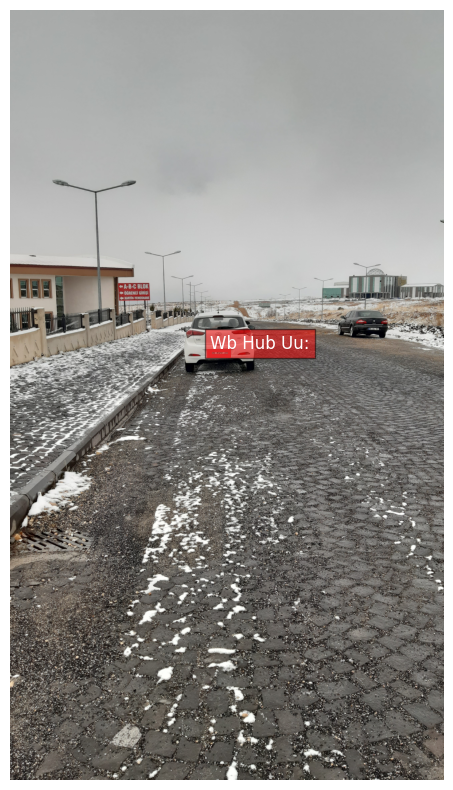


image 1/1 /content/drive/MyDrive/Arac_Plaka/data/121.jpg: 640x384 1 plate, 6.9ms
Speed: 2.6ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


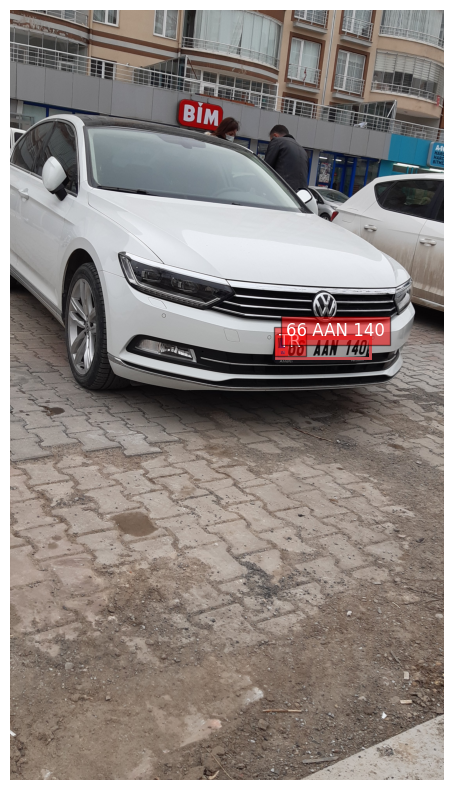


image 1/1 /content/drive/MyDrive/Arac_Plaka/data/248.jpg: 640x384 1 plate, 6.5ms
Speed: 2.5ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


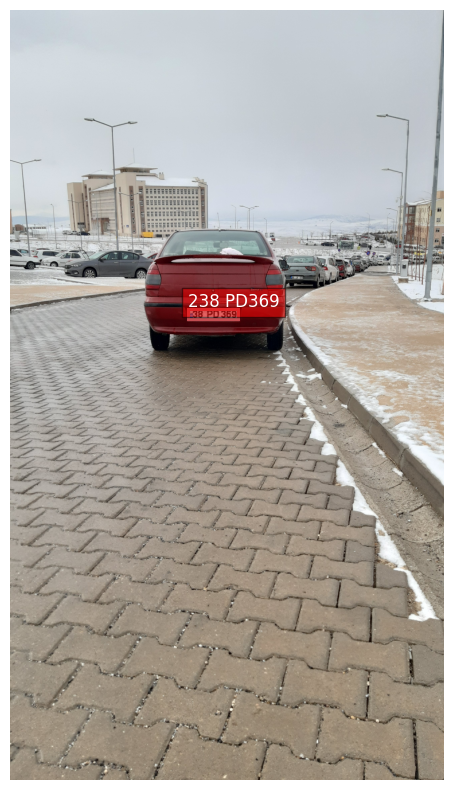

In [9]:
from PIL import Image, ExifTags # Import the ExifTags class
# Görüntü iyileştirme fonksiyonu
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)
    blurred = cv2.GaussianBlur(equalized, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary


# Fotoğraf oryantasyonunu düzeltme fonksiyonu
def correct_orientation(image_path):
    try:
        image = Image.open(image_path)
        try:
            exif = image._getexif()
            if exif:
                for tag, value in exif.items():
                    if tag in ExifTags.TAGS and ExifTags.TAGS[tag] == 'Orientation':
                        if value == 3:
                            image = image.rotate(180, expand=True)
                        elif value == 6:
                            image = image.rotate(270, expand=True)
                        elif value == 8:
                            image = image.rotate(90, expand=True)
        except AttributeError:
            # EXIF verisi yoksa veya okuma hatası
            pass
        return image
    except (OSError, UnidentifiedImageError) as e:
        print(f"Error processing image {image_path}: {e}")
        return None


# Sonuçları görselleştirme fonksiyonu
def plot_results(image_path, results):
    image = np.array(correct_orientation(image_path))
    plt.figure(figsize=(12, 10))
    plt.imshow(image)
    ax = plt.gca()

    if results[0].boxes is not None:
        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            confidence = box.conf.item()
            class_id = int(box.cls.item())
            class_name = model.names[class_id]

            cropped_image = image[y1:y2, x1:x2]

            processed_image = preprocess_image(cropped_image)
            result = reader.readtext(processed_image, detail=1)

            if result:
                for res in result:
                    text = res[1]
                    bbox = np.array(res[0])
                    x_min, y_min = np.min(bbox, axis=0)
                    x_max, y_max = np.max(bbox, axis=0)

                    x_min = int(x1 + x_min)
                    y_min = int(y1 + y_min)
                    x_max = int(x1 + x_max)
                    y_max = int(y1 + y_max)

                    plt.text(x_min, y_min - 10, text, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
                    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
                    ax.add_patch(rect)

            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    else:
        print("No detections were made.")

    plt.axis('off')
    plt.show()

# Fotoğraf yolları listesi
image_paths = [
    '/content/drive/MyDrive/Arac_Plaka/data/324.jpg',
    '/content/drive/MyDrive/Arac_Plaka/data/121.jpg',
    '/content/drive/MyDrive/Arac_Plaka/data/248.jpg'
]

# Her fotoğraf üzerinde işlem yap
for img_path in image_paths:
    results = model(img_path)
    if results is not None:  # Check if results are valid before plotting
        plot_results(img_path, results)